In [28]:
import pandas as pd
from collections import Counter
import matplotlib.pylab as plt
import numpy as np

df= pd.read_csv('RAW_recipes.csv')
timer=df.minutes
ingred=df.n_ingredients
#analyze whats the distribution of time to cook 
timer_count=Counter(timer)
d=timer_count.items()
minutes=np.array([x[0] for x in d])
quantity=np.array([x[1] for x in d])
max_time=120 #2hours
for i in range(len(minutes)):
    if minutes[i]>max_time: #for ease let's remove the recipes if they take more than max_time to cook 
        minutes[i]=0
        quantity[i]=0
    #round the time to cook to the nearest time factor of 10 minutes
    if minutes[i]%10!=0:#if the time to cook is not a factor of 10 (e.g. 10, 20,.. minutes)
        d=minutes[i]
        minutes[i]=round(d/10)*10 # approximate to the nearest 10 minutes

In [29]:
#Now 2 lists minutes1 and quantity1 prepresent how many recipes can be cooked in 10, 20,... minutes
#next few lines just cleaning the data
minutes1=[int(a) for a in minutes if int(a)!=0]
quantity1=[int(b) for b in quantity if int(b)!=0]
minutes2=[i*10 for i in range(int((max_time)/10)+1)]
quantity2=[0]*len(minutes2)


In [30]:
for i in range(len(minutes2)):
    a=minutes2[i]
    for k in range(len(minutes1)):
        if minutes1[k]==a:
            quantity2[i]=quantity2[i]+quantity1[k]
            

In [31]:
minutes2=minutes2[1:]
quantity2=quantity2[1:]
print(minutes2,quantity2)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120] [33631, 18020, 38869, 37781, 2679, 11512, 2620, 19341, 13220, 8545, 6679, 12883]


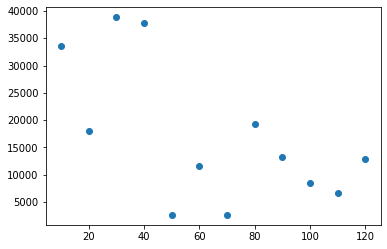

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
#show distribution of how many recipes depending on how much time to cook
ax.plot(minutes2,quantity2,'o')
plt.show()

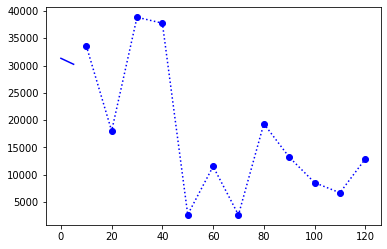

In [33]:
poly_min = np.poly1d(np.polyfit(minutes2, quantity2, 1))
plt.plot(minutes2, quantity2, 'bo:')
poly_x = np.linspace(0, 5, 120)
plt.plot(poly_x, poly_min(poly_x), 'b')
#plot how many recipes for 5, 10, 15, .. minutes of cooking time

In [123]:
df= pd.read_csv('RAW_recipes.csv')
tags=df.tags
tag_list = df["tags"].tolist()
for i in range(len(tag_list)):
    tag_list[i]=tag_list[i].replace("[",'')
    tag_list[i]=tag_list[i].replace("]",'')
    tag_list[i]=tag_list[i].split(', ')

L=str(tag_list).replace('[', '').replace(']', '') 
L1=L.replace('"', '')
L3=L1.replace("'",'')
L2=L3.split(', ')
tag_lst=Counter(L2)
#evaluate the most common tags
#print(tag_lst.most_common(500))
tag=[('dietary', 165091), ('main-dish', 71786),  ('meat', 56042), ('vegetables', 53814), ('low-sodium', 43349), ('desserts', 43203), ('low-carb', 42189), ('low-cholesterol', 36743), ('low-calorie', 36429), ('vegetarian', 35651), ('low-protein', 32522), ('eggs-dairy', 30142), ('side-dishes', 26902), ('low-fat', 22170), ('appetizers', 20379), ('seafood', 14791), ('salads', 14687),  ('condiments-etc', 11874), ('beverages', 11124),  ('savory', 10544), ('sweet', 10543), ('vegan', 10012), ('very-low-carbs', 9201), ('eggs', 8577), ('spicy', 8225), ('fish', 7462), ('high-protein', 7209),  ('crock-pot-slow-cooker', 6608), ('diabetic', 6458), ('gluten-free', 5743), ('sauces', 5556), ('egg-free', 5064), ('high-calcium', 4907), ('grilling', 4782), ('dips', 4727), ('barbecue', 4116), ('lactose', 4105), ('salad-dressings', 2389), ('spreads', 2289), ('smoothies', 1878), ('broil', 1868), ('stir-fry', 1690),  ('deep-fry', 1114), ('pressure-cooker', 314),  ('nut-free', 218),('dairy-free', 195)]
key_tag=[x[0] for x in tag]
print(sorted(key_tag))

['appetizers', 'barbecue', 'beverages', 'broil', 'condiments-etc', 'crock-pot-slow-cooker', 'dairy-free', 'deep-fry', 'desserts', 'diabetic', 'dietary', 'dips', 'egg-free', 'eggs', 'eggs-dairy', 'fish', 'gluten-free', 'grilling', 'high-calcium', 'high-protein', 'lactose', 'low-calorie', 'low-carb', 'low-cholesterol', 'low-fat', 'low-protein', 'low-sodium', 'main-dish', 'meat', 'nut-free', 'pressure-cooker', 'salad-dressings', 'salads', 'sauces', 'savory', 'seafood', 'side-dishes', 'smoothies', 'spicy', 'spreads', 'stir-fry', 'sweet', 'vegan', 'vegetables', 'vegetarian', 'very-low-carbs']
